<a href="https://colab.research.google.com/github/csh-scl/LLM-Study/blob/main/Langchain_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Text Splitter


Text Splitter는 특정 기준을 통해 텍스트를 청크로 나누는 모듈입니다. 예를 들어, CharacterTextSplitter는 특정 구분자를 기준으로 텍스트를 청크로 분할합니다. 이렇게 함으로써 토큰 제한 이슈를 우회하여 Context를 학습시킬 수 있습니다

#### CharacterTextSplitter  

가장 간단한 텍스트 분할기로, 특정 구분자를 기준으로 텍스트를 여러 개로 분할합니다.

In [ ]:
# 구글 드라이브 mount 해오기.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 파일 읽기
with open('/content/drive/MyDrive/state_of_the_union.txt') as f:
    state_of_the_union = f.read()

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator = "\n\n",
    chunk_size = 1000,
    chunk_overlap  = 100,
    length_function = len,
)

In [ ]:
texts = text_splitter.split_text(state_of_the_union)
print(len(texts))
print(texts[0])
print("-"*100)
print(texts[1])
print("-"*100)
print(texts[2])


55
Madame Speaker, Vice President Biden, members of Congress, distinguished guests, and fellow Americans:

Our Constitution declares that from time to time, the president shall give to Congress information about the state of our union. For 220 years, our leaders have fulfilled this duty. They have done so during periods of prosperity and tranquility. And they have done so in the midst of war and depression; at moments of great strife and great struggle.
----------------------------------------------------------------------------------------------------
It's tempting to look back on these moments and assume that our progress was inevitable, that America was always destined to succeed. But when the Union was turned back at Bull Run and the Allies first landed at Omaha Beach, victory was very much in doubt. When the market crashed on Black Tuesday and civil rights marchers were beaten on Bloody Sunday, the future was anything but certain. These were times that tested the courage of our co

In [ ]:
char_list = []
for i in range(len(texts)):
    char_list.append(len(texts[i]))
print(char_list)

[454, 707, 930, 848, 896, 818, 846, 892, 813, 721, 730, 919, 996, 926, 839, 900, 850, 529, 614, 493, 582, 746, 1163, 878, 483, 607, 740, 419, 902, 794, 714, 416, 894, 917, 934, 711, 548, 506, 784, 948, 619, 669, 510, 1015, 714, 527, 701, 597, 436, 750, 558, 992, 920, 786, 790]


In [ ]:
print(text_splitter.create_documents([state_of_the_union]))

[Document(metadata={}, page_content='Madame Speaker, Vice President Biden, members of Congress, distinguished guests, and fellow Americans:\n\nOur Constitution declares that from time to time, the president shall give to Congress information about the state of our union. For 220 years, our leaders have fulfilled this duty. They have done so during periods of prosperity and tranquility. And they have done so in the midst of war and depression; at moments of great strife and great struggle.'), Document(metadata={}, page_content="It's tempting to look back on these moments and assume that our progress was inevitable, that America was always destined to succeed. But when the Union was turned back at Bull Run and the Allies first landed at Omaha Beach, victory was very much in doubt. When the market crashed on Black Tuesday and civil rights marchers were beaten on Bloody Sunday, the future was anything but certain. These were times that tested the courage of our convictions and the strength

#### RecursiveCharacterTextSplit

RecursiveCharacterTextSplit은 재귀적으로 문서를 분할합니다. 먼저, "\n\n"(줄바꿈)을 기준으로 문서를 분할하고 이렇게 나눈 청크가 여전히 너무 클 경우에 "\n"(문장 단위)을 기준으로 문서를 분할합니다. 그렇게 했을 때에도 청크가 충분히 작아지지 않았다면 문장을 단어 단위로 자르게 되지만, 그렇게까지 세부적인 분할은 자주 필요하지 않습니다.

이런 식의 분할 방법은 문장들의 의미를 최대한 보존하는 형태로 분할할 수 있도록 만들고, 그렇기 때문에 다수의 청크를 LLM에 활용함에 있어서 맥락이 유지되도록 하기에 용이합니다.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 1000,
    chunk_overlap  = 200,
    length_function = len,
)

In [ ]:
texts = text_splitter.create_documents([state_of_the_union])
print(texts[0].page_content)
print(len(texts[0].page_content)) # chuck_size 보다 작지만 문맥을 위해 더 작게 짤린 모습

print("-"*500)
print(texts[1].page_content)

Madame Speaker, Vice President Biden, members of Congress, distinguished guests, and fellow Americans:

Our Constitution declares that from time to time, the president shall give to Congress information about the state of our union. For 220 years, our leaders have fulfilled this duty. They have done so during periods of prosperity and tranquility. And they have done so in the midst of war and depression; at moments of great strife and great struggle.
454
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
It's tempting to look back on these mome

In [ ]:
char_list = []
for i in range(len(texts)):
    char_list.append(len(texts[i].page_content))
print(char_list)
# 다양한 값들도 분할된 모습을 볼 수 있다.

[454, 707, 930, 848, 896, 818, 846, 892, 813, 721, 730, 576, 841, 939, 980, 820, 936, 585, 529, 614, 493, 582, 746, 995, 365, 878, 483, 607, 740, 419, 902, 794, 714, 416, 894, 917, 934, 711, 548, 506, 784, 948, 619, 669, 510, 996, 216, 714, 527, 701, 597, 436, 750, 558, 992, 920, 786, 949]


#### 토큰 단위 텍스트 분할기

텍스트 분할의 목적은 LLM이 소화할 수 있을 정도의 텍스트만 호출하도록 만드는 것입니다. 따라서 LLM이 소화할 수 있는 양으로 청크를 제한하는 것은 LLM 앱을 개발할 때 필수적인 과정입니다.

LLM은 텍스트를 받아들일 때, 정해진 토큰 이상으로 소화할 수 없게 설계되어 있습니다. 따라서 글을 토큰 단위로 분할한다면 최대한 많은 글을 포함하도록 청크를 분할할 수 있습니다.

토큰이라는 것은, 텍스트와 달리 Transformer에서 처리하는 방식에 따라서 그 수가 달라질 수 있습니다. 따라서, LLM 앱을 개발하고자 한다면 앱에 얹힐 LLM의 토큰 제한을 파악하고, 해당 LLM이 사용하는 Embedder를 기반으로 토큰 수를 계산해야 합니다. 예를 들어, OpenAI의 GPT 모델은 tiktoken이라는 토크나이저를 기반으로 텍스트를 토큰화합니다. 따라서 tiktoken encoder를 기반으로 텍스트를 토큰화하고, 토큰 수를 기준으로 텍스트를 분할하는 것이 프로덕트 개발의 필수 요소라고 할 수 있습니다.

--> GPT 계열 모델은 텍스트를 문자 단위가 아닌 토큰(token) 단위로 쪼개서 학습한다

In [ ]:
!pip install tiktoken

In [ ]:
import tiktoken
tokenizer = tiktoken.get_encoding("cl100k_base")

def tiktoken_len(text):
    tokens = tokenizer.encode(text)
    return len(tokens)

In [ ]:
tiktoken_len(texts[1].page_content)

139

In [ ]:
token_list = []
for i in range(len(texts)):
    token_list.append(tiktoken_len(texts[i].page_content))
print(token_list)

[88, 139, 184, 190, 177, 178, 175, 184, 174, 141, 149, 115, 166, 187, 188, 166, 180, 113, 96, 118, 97, 113, 146, 206, 73, 176, 94, 112, 140, 83, 189, 167, 142, 90, 184, 190, 187, 139, 112, 101, 151, 203, 139, 125, 103, 211, 43, 136, 91, 129, 127, 93, 139, 111, 199, 198, 159, 212]


### Text Embedding

In [ ]:
pip install openai langchain pypdf tiktoken

In [ ]:
pip install langchain langchain-community langchain-openai

In [ ]:
from langchain.embeddings import OpenAIEmbeddings

In [ ]:
import os
from langchain.embeddings import OpenAIEmbeddings

# api_key = os.getenv("OPENAI_API_KEY") Colab 환경에서는 내 로컬 pc에 시스템 변수 접근 불가
os.environ["OPENAI_API_KEY"] = "Your Api Key"


In [ ]:
api_key = os.getenv("OPENAI_API_KEY")
embeddings_model = OpenAIEmbeddings(openai_api_key=api_key) # 코랩 사용시 API 관리 중요

In [ ]:
embeddings = embeddings_model.embed_documents(
    [
        "안녕하세요",
        "제 이름은 홍길동입니다.",
        "이름이 무엇인가요?",
        "랭체인은 유용합니다.",
        "Hello World!"
    ]
)
len(embeddings), len(embeddings[0])
# 질문들 5개를 1536 차원으로 Embedding

(5, 1536)

In [ ]:
embedded_query_q = embeddings_model.embed_query("이 대화에서 언급된 이름은 무엇입니까?")
embedded_query_a = embeddings_model.embed_query("이 대화에서 언급된 이름은 홍길동입니다.")
print(len(embedded_query_q), len(embedded_query_a))

1536 1536


In [ ]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B)) # Cos 유사도를 이용해 가장 비슷한 벡터 답안 계산

In [ ]:
print(cos_sim(embedded_query_q, embedded_query_a))
print(cos_sim(embedded_query_q, embeddings[1]))
print(cos_sim(embedded_query_q, embeddings[3]))

0.9014128168326816
0.8500448401842651
0.7753276243070567


##### Huggingface Embedding

In [ ]:
!pip install sentence_transformers

In [ ]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-small-en"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
hf = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

In [ ]:
embeddings = hf.embed_documents(
    [
    "today is monday",
    "weather is nice today",
    "what's the problem?",
    "langhcain in useful",
    "Hello World!",
    "my name is morris"
    ]
)
for i, emb in enumerate(embeddings):
    print(f"문장 {i+1} 임베딩 길이 {len(emb)}")

문장 1 임베딩 길이 384
문장 2 임베딩 길이 384
문장 3 임베딩 길이 384
문장 4 임베딩 길이 384
문장 5 임베딩 길이 384
문장 6 임베딩 길이 384


허킹페이스 임베딩 한 결과 384차원

In [ ]:
BGE_query_q = hf.embed_query("Hello? who is this?")
BGE_query_a = hf.embed_query("hi this is harrison")

print(len(BGE_query_q))
print(cos_sim(BGE_query_q, BGE_query_a))
print(cos_sim(BGE_query_q, embeddings[1]))
print(cos_sim(BGE_query_q, embeddings[5]))

384
0.8522539963959582
0.7469068258795019
0.792870413704442


In [ ]:
sentences = [
    "안녕하세요",
    "제 이름은 홍길동입니다.",
    "이름이 무엇인가요?",
    "랭체인은 유용합니다.",
    "홍길동 아버지의 이름은 홍상직입니다."
    ]
ko_embeddings = hf.embed_documents(sentences)

In [ ]:
BGE_query_q_2 = hf.embed_query("홍길동은 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까?")
BGE_query_a_2 = hf.embed_query("홍길동의 아버지는 엄했습니다.")


print("질문: 홍길동은 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까? \n", "-"*100)
print("홍길동의 아버지는 엄했습니다. \t\t 문장 유사도: ", round(cos_sim(BGE_query_q_2, BGE_query_a_2),2))
print(sentences[1] + "\t\t\t 문장 유사도: ", round(cos_sim(BGE_query_q_2, ko_embeddings[1]),2))
print(sentences[3] + "\t\t\t 문장 유사도: ", round(cos_sim(BGE_query_q_2, ko_embeddings[3]),2))
print(sentences[4] + "\t 문장 유사도: ", round(cos_sim(BGE_query_q_2, ko_embeddings[4]),2))

질문: 홍길동은 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까? 
 ----------------------------------------------------------------------------------------------------
홍길동의 아버지는 엄했습니다. 		 문장 유사도:  0.95
제 이름은 홍길동입니다.			 문장 유사도:  0.88
랭체인은 유용합니다.			 문장 유사도:  0.85
홍길동 아버지의 이름은 홍상직입니다.	 문장 유사도:  0.92


##### 한국어 사전학습 모델 임베딩 - ko-sbert-nli

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

model_name = "jhgan/ko-sbert-nli"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
ko = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

In [ ]:
sentences = [
    "안녕하세요",
    "제 이름은 홍길동입니다.",
    "이름이 무엇인가요?",
    "랭체인은 유용합니다.",
    "홍길동 아버지의 이름은 홍상직입니다."
    ]

ko_embeddings = ko.embed_documents(sentences)

q = "홍길동은 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까?"
a = "홍길동의 아버지는 엄했습니다."
ko_query_q = ko.embed_query(q)
ko_query_a = ko.embed_query(a)

print("질문: {} \n".format(q), "-"*100)
print("{} \t\t 문장 유사도: ".format(a), round(cos_sim(ko_query_q, ko_query_a),2))
print("{}\t\t\t 문장 유사도: ".format(sentences[1]), round(cos_sim(ko_query_q, ko_embeddings[1]),2))
print("{}\t\t\t 문장 유사도: ".format(sentences[3]), round(cos_sim(ko_query_q, ko_embeddings[3]),2))
print("{}\t 문장 유사도: ".format(sentences[4]), round(cos_sim(ko_query_q, ko_embeddings[4]),2))

질문: 홍길동은 아버지를 아버지라 부르지 못하였습니다. 홍길동 아버지의 이름은 무엇입니까? 
 ----------------------------------------------------------------------------------------------------
홍길동의 아버지는 엄했습니다. 		 문장 유사도:  0.47
제 이름은 홍길동입니다.			 문장 유사도:  0.54
랭체인은 유용합니다.			 문장 유사도:  0.03
홍길동 아버지의 이름은 홍상직입니다.	 문장 유사도:  0.61


거짓 answer 값을 주어도 모델이 올바르게 학습한 모습을 볼 수 있었다.

### VectorStore

VectorStore는 자연어 --> 숫자 처리한 후 이들을 저장하는 벡터 저장소

벡터 저장소는 임베딩된 데이터를 인덱싱하여, input으로 받아들이는 query와의 유사도를 빠르게 출력합니다.

대표적으로 FAISS, Chroma가 존재합니다.

#### Chroma

In [ ]:
!pip install chromadb tiktoken transformers sentence_transformers openai langchain pypdf # 오픈소스 벡터 저장소

VectorStore는 벡터를 일시적으로 저장합니다. 텍스트와 임베딩 함수를 지정하여 from_documents() 함수에 보내면, 지정된 임베딩 함수를 통해 텍스트를 벡터로 변환하고, 이를 임시 db로 생성합니다.

그리고 similarity_search() 함수에 쿼리를 지정해주면 이를 바탕으로 가장 벡터 유사도가 높은 벡터를 찾고 이를 자연어 형태로 출력합니다.

In [ ]:
import tiktoken
from langchain.text_splitter import RecursiveCharacterTextSplitter

tokenizer = tiktoken.get_encoding("cl100k_base")

def tiktoken_len(text):
    tokens = tokenizer.encode(text)
    return len(tokens)

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.document_loaders import PyPDFLoader


# load the document and split it into chunks
loader = PyPDFLoader("/content/drive/MyDrive/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf")
pages = loader.load_and_split()

# split it into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0, length_function = tiktoken_len)
docs = text_splitter.split_documents(pages)

# create the open-source embedding function
from langchain.embeddings import HuggingFaceEmbeddings

model_name = "jhgan/ko-sbert-nli"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
hf = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)


In [ ]:
# load it into Chroma
db = Chroma.from_documents(docs, hf)

# query it
query = "6대 먹거리 산업은?"
docs = db.similarity_search(query)

# print results
print(docs[0].page_content)

유사한 형태의 정보처리기술을 말하며, 인공지능, 상황인지컴퓨팅 등의 품목으로 구성됨-컴퓨팅 기술을 활용한 다양한 사업화가 활발히 진행되고 있어 혁신성장 정책금융 공급 규모가 매년 약 100% 수준으로 증가하고 있으며, 새정부의 ‘미래 먹거리산업 신성장 전략추진*’에 따라 인공지능 관련 기술로의 금융지원이 늘어날 것으로 전망됨       * 에너지, 방산, 우주항공, 인공지능(AI), 바이오, 탄소중립 대응, 스마트농업을 차세대 6대 먹거리 산업으로 선정


인메모리 DB 사용시 데이터가 영구적으로 저장되지 않고 소멸된다. 따라서 persist() 함수를 통해 벡터저장소를 로컬 저장하고, Chroma 객체를 선언할 때 로컬 저장소 경로를 지정하여 필요할 때 다시 불러올 수 있다.
###### chroma_db 영구 저장소 사용

In [ ]:
# save to disk
db2 = Chroma.from_documents(docs, hf, persist_directory="./chroma_db")
docs = db2.similarity_search(query)

In [ ]:
# load from disk
db3 = Chroma(persist_directory="./chroma_db", embedding_function=hf)
docs = db3.similarity_search(query)
print(docs[0].page_content)

유사한 형태의 정보처리기술을 말하며, 인공지능, 상황인지컴퓨팅 등의 품목으로 구성됨-컴퓨팅 기술을 활용한 다양한 사업화가 활발히 진행되고 있어 혁신성장 정책금융 공급 규모가 매년 약 100% 수준으로 증가하고 있으며, 새정부의 ‘미래 먹거리산업 신성장 전략추진*’에 따라 인공지능 관련 기술로의 금융지원이 늘어날 것으로 전망됨       * 에너지, 방산, 우주항공, 인공지능(AI), 바이오, 탄소중립 대응, 스마트농업을 차세대 6대 먹거리 산업으로 선정


쿼리와 유사한 문서(청크)를 불러올 때, 유사도를 함께 제공하는 함수 similarity_search_with_score()를 제공합니다. 이를 통해서 내가 얻은 유사한 문장들의 유사도를 비교할 수 있으며, 특정 유사도 이상의 문서만 출력하도록 하는 등 다양한 활용이 가능합니다.

In [ ]:
docs = db3.similarity_search_with_relevance_scores(query, k=3)

print("가장 유사한 문서:\n\n {}\n\n".format(docs[0][0].page_content))
print("문서 유사도:\n {}".format(docs[0][1]))

가장 유사한 문서:

 유사한 형태의 정보처리기술을 말하며, 인공지능, 상황인지컴퓨팅 등의 품목으로 구성됨-컴퓨팅 기술을 활용한 다양한 사업화가 활발히 진행되고 있어 혁신성장 정책금융 공급 규모가 매년 약 100% 수준으로 증가하고 있으며, 새정부의 ‘미래 먹거리산업 신성장 전략추진*’에 따라 인공지능 관련 기술로의 금융지원이 늘어날 것으로 전망됨       * 에너지, 방산, 우주항공, 인공지능(AI), 바이오, 탄소중립 대응, 스마트농업을 차세대 6대 먹거리 산업으로 선정


문서 유사도:
 0.26836897918932756


#### FAISS

Facebook AI 유사성 검색(Faiss)은 고밀도 벡터의 효율적인 유사성 검색 및 클러스터링을 위한 라이브러리입니다. 여기에는 모든 크기의 벡터 집합에서 검색하는 알고리즘이 포함되어 있으며, RAM에 맞지 않을 수 있는 벡터까지 검색할 수 있습니다. 또한 평가 및 매개변수 조정을 위한 지원 코드도 포함되어 있습니다.

In [ ]:
pip install faiss-cpu # For CPU Installation

In [ ]:
from langchain.vectorstores import FAISS

In [ ]:
loader = PyPDFLoader("/content/drive/MyDrive/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf")
pages = loader.load_and_split()

# split it into chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0, length_function = tiktoken_len)
docs = text_splitter.split_documents(pages)

from langchain.embeddings import HuggingFaceEmbeddings

model_name = "jhgan/ko-sbert-nli"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
ko = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

In [ ]:
db = FAISS.from_documents(docs, ko) # 분리한 pdf 내용을 인베딩 해서 db에 저장

In [ ]:
query = "인공지능 산업구조는 어떻게 구성되어있어?"
docs = db.similarity_search(query)
print(docs[0].page_content)

▶다양한 데이터나 복잡한 자료 속에서 핵심적인 특징을 요약하는 ①데이터 추상화 기술, 방대한 지식체계를 이용하는 ②빅데이터 기술, 빅데이터를 처리하기 위한 ③고성능 컴퓨팅 기술이 인공지능 구현의 핵심임￮데이터를 추상화하는 방법은 크게 인공신경망(ANN), 심층신경망(DNN), 합성곱신경망(CNN) 및 순환신경망(RNN) 등으로 구분됨[인공지능 데이터 추상화 기술]구분특징장점단점인공신경망(ANN)Artificial Neural Network사람의 신경망 원리와 구조를 모방하여 만든 기계학습 알고리즘으로, 입력층, 출력층, 은닉층으로 구성 모든 비선형 함수 학습이 가능알고리즘을 최적화하기 어려운 학습 환경 발생심층신경망(DNN)Deep Neural Network입력층과 출력층 사이에 2개 이상의 은닉층들로 이뤄진 인공신경망ANN의 문제점 개선학습환경에 따라 높은 시간 복잡도 문제 발생합성곱신경망(CNN)Convolution Neural Network데이터의 특징을 추출하여 특징들의 패턴을 파악하는 인공신경망이미지, 영상 데이터 판별에 강점특징추출 과정에서 정보손실 발생순환신경망(RNN)Recurrent Neural


In [ ]:
docs_and_scores = db.similarity_search_with_score(query)
docs_and_scores

[(Document(id='2724bae6-b135-4c9e-81c3-57a66c1590a0', metadata={'producer': 'Hancom PDF 1.3.0.538', 'creator': 'Hancom PDF 1.3.0.538', 'creationdate': '2022-07-29T09:03:16+09:00', 'author': 'kmd kdy', 'moddate': '2022-07-29T09:03:16+09:00', 'pdfversion': '1.4', 'source': '/content/drive/MyDrive/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf', 'total_pages': 18, 'page': 8, 'page_label': '9'}, page_content='▶다양한 데이터나 복잡한 자료 속에서 핵심적인 특징을 요약하는 ①데이터 추상화 기술, 방대한 지식체계를 이용하는 ②빅데이터 기술, 빅데이터를 처리하기 위한 ③고성능 컴퓨팅 기술이 인공지능 구현의 핵심임￮데이터를 추상화하는 방법은 크게 인공신경망(ANN), 심층신경망(DNN), 합성곱신경망(CNN) 및 순환신경망(RNN) 등으로 구분됨[인공지능 데이터 추상화 기술]구분특징장점단점인공신경망(ANN)Artificial Neural Network사람의 신경망 원리와 구조를 모방하여 만든 기계학습 알고리즘으로, 입력층, 출력층, 은닉층으로 구성 모든 비선형 함수 학습이 가능알고리즘을 최적화하기 어려운 학습 환경 발생심층신경망(DNN)Deep Neural Network입력층과 출력층 사이에 2개 이상의 은닉층들로 이뤄진 인공신경망ANN의 문제점 개선학습환경에 따라 높은 시간 복잡도 문제 발생합성곱신경망(CNN)Convolution Neural Network데이터의 특징을 추출하여 특징들의 패턴을 파악하는 인공신경망이미지, 영상 데이터 판별에 강점특징추출 과정에서 정보손실 발생순환신경망(RNN)Recurrent Neural'),
  

In [ ]:
db.save_local("faiss_index")

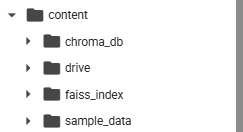
##### 실제 content에 영구적으로 저장된 모습

#####📦 불러오는 방법:
저장된 FAISS 인덱스는 이렇게 다시 불러올 수 오는법

In [ ]:
from langchain.vectorstores import FAISS

# db = FAISS.load_local("faiss_index", embedding="ko")

TypeError: FAISS.load_local() missing 1 required positional argument: 'embeddings'

In [ ]:
# new_db = FAISS.load_local("faiss_index", ko)
## LangChain 0.1.14 이후부터는 보안 상 이유로 .pkl (Pickle) 로딩을 기본적으로 막아놈


query = "인공지능 산업구조는 어떻게 구성되어있어?"
docs = new_db.similarity_search_with_relevance_scores(query, k=3)


print("질문: {} \n".format(query))
for i in range(len(docs)):
    print("{0}번째 유사 문서 유사도 \n{1}".format(i+1,round(docs[i][1],2)))
    print("-"*100)
    print(docs[i][0].page_content)
    print("\n")
    print(docs[i][0].metadata)
    print("-"*100)

질문: 인공지능 산업구조는 어떻게 구성되어있어? 

1번째 유사 문서 유사도 
0.47999998927116394
----------------------------------------------------------------------------------------------------
▶다양한 데이터나 복잡한 자료 속에서 핵심적인 특징을 요약하는 ①데이터 추상화 기술, 방대한 지식체계를 이용하는 ②빅데이터 기술, 빅데이터를 처리하기 위한 ③고성능 컴퓨팅 기술이 인공지능 구현의 핵심임￮데이터를 추상화하는 방법은 크게 인공신경망(ANN), 심층신경망(DNN), 합성곱신경망(CNN) 및 순환신경망(RNN) 등으로 구분됨[인공지능 데이터 추상화 기술]구분특징장점단점인공신경망(ANN)Artificial Neural Network사람의 신경망 원리와 구조를 모방하여 만든 기계학습 알고리즘으로, 입력층, 출력층, 은닉층으로 구성 모든 비선형 함수 학습이 가능알고리즘을 최적화하기 어려운 학습 환경 발생심층신경망(DNN)Deep Neural Network입력층과 출력층 사이에 2개 이상의 은닉층들로 이뤄진 인공신경망ANN의 문제점 개선학습환경에 따라 높은 시간 복잡도 문제 발생합성곱신경망(CNN)Convolution Neural Network데이터의 특징을 추출하여 특징들의 패턴을 파악하는 인공신경망이미지, 영상 데이터 판별에 강점특징추출 과정에서 정보손실 발생순환신경망(RNN)Recurrent Neural


{'producer': 'Hancom PDF 1.3.0.538', 'creator': 'Hancom PDF 1.3.0.538', 'creationdate': '2022-07-29T09:03:16+09:00', 'author': 'kmd kdy', 'moddate': '2022-07-29T09:03:16+09:00', 'pdfversion': '1.4', 'source': '/content/drive/MyDrive/[이슈리포트 2022-2호] 혁ᄉ

In [ ]:
query = "인공지능 산업구조는 어떻게 구성되어있어?"
docs = new_db.max_marginal_relevance_search(query,k=3,fetch_k = 10, lambda_mult = 0.3)

print("질문: {} \n".format(query))
for i in range(len(docs)):
    print("{}번째 유사 문서:".format(i+1))
    print("-"*100)
    print(docs[i].page_content)
    print("\n")
    print(docs[i].metadata)
    print("-"*100)
    print("\n\n")


질문: 인공지능 산업구조는 어떻게 구성되어있어? 

1번째 유사 문서:
----------------------------------------------------------------------------------------------------
▶다양한 데이터나 복잡한 자료 속에서 핵심적인 특징을 요약하는 ①데이터 추상화 기술, 방대한 지식체계를 이용하는 ②빅데이터 기술, 빅데이터를 처리하기 위한 ③고성능 컴퓨팅 기술이 인공지능 구현의 핵심임￮데이터를 추상화하는 방법은 크게 인공신경망(ANN), 심층신경망(DNN), 합성곱신경망(CNN) 및 순환신경망(RNN) 등으로 구분됨[인공지능 데이터 추상화 기술]구분특징장점단점인공신경망(ANN)Artificial Neural Network사람의 신경망 원리와 구조를 모방하여 만든 기계학습 알고리즘으로, 입력층, 출력층, 은닉층으로 구성 모든 비선형 함수 학습이 가능알고리즘을 최적화하기 어려운 학습 환경 발생심층신경망(DNN)Deep Neural Network입력층과 출력층 사이에 2개 이상의 은닉층들로 이뤄진 인공신경망ANN의 문제점 개선학습환경에 따라 높은 시간 복잡도 문제 발생합성곱신경망(CNN)Convolution Neural Network데이터의 특징을 추출하여 특징들의 패턴을 파악하는 인공신경망이미지, 영상 데이터 판별에 강점특징추출 과정에서 정보손실 발생순환신경망(RNN)Recurrent Neural


{'producer': 'Hancom PDF 1.3.0.538', 'creator': 'Hancom PDF 1.3.0.538', 'creationdate': '2022-07-29T09:03:16+09:00', 'author': 'kmd kdy', 'moddate': '2022-07-29T09:03:16+09:00', 'pdfversion': '1.4', 'source': '/content/drive/MyDrive/[이슈리포트 2022-2호] 혁신성장 정책금융 도

### Retriever

사용자 질문 → Retriever → 관련 문서 추출 → LLM에게 전달 → 답변 생성

리트리버는 비정형 쿼리가 주어지면 문서를 반환하는 인터페이스입니다. 벡터 저장소보다 더 일반적입니다. 리트리버는 문서를 저장할 필요 없이 단지 반환(또는 검색)만 할 수 있습니다. - Langchain Document

In [ ]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.document_loaders import PyPDFLoader

In [ ]:
loader = PyPDFLoader("/content/drive/MyDrive/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf")
pages = loader.load_and_split()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50, length_function = tiktoken_len)
texts = text_splitter.split_documents(pages)

from langchain.embeddings import HuggingFaceEmbeddings

model_name = "jhgan/ko-sbert-nli"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
hf = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

docsearch = Chroma.from_documents(texts, hf)

In [ ]:
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

openai = ChatOpenAI(model_name="gpt-3.5-turbo",
                    streaming=True, callbacks=[StreamingStdOutCallbackHandler()],
                    temperature = 0)

qa = RetrievalQA.from_chain_type(llm = openai,
                                 chain_type = "stuff",
                                 retriever = docsearch.as_retriever(
                                    search_type="mmr",
                                    search_kwargs={'k':3, 'fetch_k': 10}),
                                 return_source_documents = True)

query = "혁신성장 정책금융에 대해서 설명해줘"
result = qa(query)

혁신성장 정책금융은 기업 성장을 지원하고 건강한 혁신산업 생태계를 조성하기 위해 정부나 정책금융기관이 제공하는 금융 지원 제도입니다. 이를 통해 혁신성장에 필요한 자금을 기업에 지원하고, 혁신성장에 대한 정책금융 가이드라인에 따라 혁신성장 산업을 육성하며 글로벌 경쟁력을 확보하려는 노력을 기울이고 있습니다. 이러한 정책금융은 혁신성장 분야의 기업 발굴과 금융지원을 위한 기준을 가지고 있으며, 지속적으로 공급 규모와 건수를 증가시키며 혁신성장 분야를 확대해가고 있습니다.

In [ ]:
result

{'query': '혁신성장 정책금융에 대해서 설명해줘',
 'result': '혁신성장 정책금융은 기업 성장을 지원하고 건강한 혁신산업 생태계를 조성하기 위해 정부나 정책금융기관이 제공하는 금융 지원 제도입니다. 이를 통해 혁신성장에 필요한 자금을 기업에 지원하고, 혁신성장에 대한 정책금융 가이드라인에 따라 혁신성장 산업을 육성하며 글로벌 경쟁력을 확보하려는 노력을 기울이고 있습니다. 이러한 정책금융은 혁신성장 분야의 기업 발굴과 금융지원을 위한 기준을 가지고 있으며, 지속적으로 공급 규모와 건수를 증가시키며 혁신성장 분야를 확대해가고 있습니다.',
 'source_documents': [Document(metadata={'author': 'kmd kdy', 'moddate': '2022-07-29T09:03:16+09:00', 'page': 2, 'producer': 'Hancom PDF 1.3.0.538', 'page_label': '3', 'total_pages': 18, 'creationdate': '2022-07-29T09:03:16+09:00', 'creator': 'Hancom PDF 1.3.0.538', 'pdfversion': '1.4', 'source': '/content/drive/MyDrive/[이슈리포트 2022-2호] 혁신성장 정책금융 동향.pdf'}, page_content='1. 들어가며▶혁신성장 정책금융기관은 건강한 혁신산업 생태계를 조성하기 위해 기업 성장에 필요한 자금을 지원하는 혁신성장 정책금융 제도를 시행하고 있음￮혁신성장 정책금융기관은 혁신성장에 대한 정의를 구체화한 정책금융 가이드라인*에 따라 혁신성장 산업육성을 위한 정책금융 업무를 추진 중임       * 혁신성장 기업발굴 및 금융지원을 위해 활용하는 기준으로, ‘9대 테마-46개 분야-296개 품목’으로 구성▶혁신성장 정책금융 제도 시행 이후 공급 규모가 매년 증가하는 등, 미래 혁신성장 분야의 글로벌 경쟁력 확보를 

#### VectorIndexCreator

VectorIndexCreator는 문서 분할 - 임베딩 - 벡터 저장의 3가지 단계를 한 줄로 수행가능하도록 하는 함수입니다. 단순히 문서 loader를 넘겨줌으로써, 문서에 대한 질문이 가능하도록 합니다.
 이를 통해 생성한 index 객체에 query()함수를 통해 질문하면 QA Chain이 작동하여 LLM이 답변까지 가능.

In [ ]:
from langchain.chat_models  import ChatOpenAI

llm = ChatOpenAI(
    model_name='gpt-3.5-turbo',
)

In [ ]:
from langchain.indexes import VectorstoreIndexCreator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loader = PyPDFLoader("/content/drive/MyDrive/[복지이슈 FOCUS 15ȣ] 경기도 극저신용대출심사모형 개발을 위한 국내 신용정보 활용가능성 탐색.pdf")
pages = loader.load_and_split()

In [ ]:
from langchain.indexes import VectorstoreIndexCreator

In [ ]:
index = VectorstoreIndexCreator(embedding=embedding,
    text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=1000, chunk_overlap=0)
).from_loaders([loader])

NameError: name 'embedding' is not defined

In [ ]:
query = "현행 극저신용대출 심사기준은 무엇인가 answer in Korean"
index.query(llm = llm, question = query)

NameError: name 'index' is not defined

In [ ]:
index.query_with_sources(llm = llm, question = query)